In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # This matches LaTeX's default font
    "font.size": 11,                       # This matches the 11pt in \documentclass
})




np.random.seed(88)

n = 27

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X

def Gradient_OLS(X, y,theta, n=100):
    return (2.0/n)*X.T @ (X @ theta-y)
def Gradient_Ridge(X, y, theta, lambda_param=1.0,n=100):
    return (2.0/n)*X.T @ (X @ theta-y) + 2*lambda_param*theta
# Ordinary Least Squares Analytical solution
def OLS_parameters(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

## part h : CV as resampling technique
The aim here is to implement another widely popular resampling technique, the so-called cross-
validation method.
Implement the k-fold cross-validation algorithm (feel free to use the functionality of Scikit-Learn
or write your own code) and evaluate again the MSE function resulting from the test folds.
Compare the MSE you get from your cross-validation code with the one you got from your boot-
strap code from the previous exercise. Comment and interpret your results.
In addition to using the ordinary least squares method, you should include both Ridge and Lasso
regression in the final analysis.

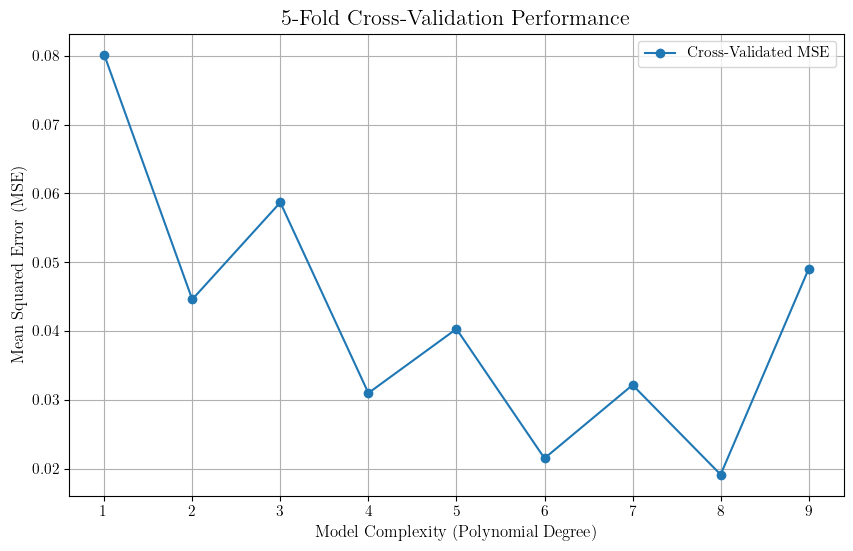

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



k = 5 
start_deg = 1
end_deg = 10
degrees = range(start_deg, end_deg)

y_centered = y_noise - y_noise.mean()
# Store the average MSE from the k-folds for each degree
mses_cv = []

for p in degrees:
    X = polynomial_features(x, p)
    
    # KFold object provides train/test indices to split data
    kfold = KFold(n_splits=k, shuffle=True, random_state=88)
    
    # Store the MSE for each of the k folds
    fold_mses = []
    
    # Loop through each fold
    for train_indices, test_indices in kfold.split(X):
        # Split data for the current fold
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y_centered[train_indices], y_centered[test_indices]
        
        # Scale data INSIDE the loop to prevent data leakage
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test) # Use same scaler for test data
        
        # Train model and make predictions
        beta = OLS_parameters(X_train_scaled, y_train)
        y_pred = X_test_scaled @ beta
        
        # Calculate and store the MSE for this fold
        fold_mses.append(mean_squared_error(y_test, y_pred))
        
    # Calculate the average MSE across all folds for this polynomial degree
    mses_cv.append(np.mean(fold_mses))


plt.figure(figsize=(10, 6))
plt.plot(degrees, mses_cv, 'o-', label="Cross-Validated MSE")
plt.xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title(f"{k}-Fold Cross-Validation Performance", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
